# Oil Mining Company Machine Learning Business Project

## Introduction

You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:

Collect the oil well parameters in the selected region: oil quality and volume of reserves;
Build a model for predicting the volume of reserves in the new wells;
Pick the oil wells with the highest estimated values;
Pick the region with the highest total profit for the selected oil wells.
You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Preparing the Data

In [2]:
data1 = pd.read_csv('/datasets/geo_data_0.csv')
data1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
data1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
data1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
data1.duplicated().sum()

0

In [7]:
data1['id'].duplicated().sum()

In [ ]:
data1.drop_duplicates(subset = ['id'], inplace = True)

In [8]:
data1['id'].duplicated().sum()

0

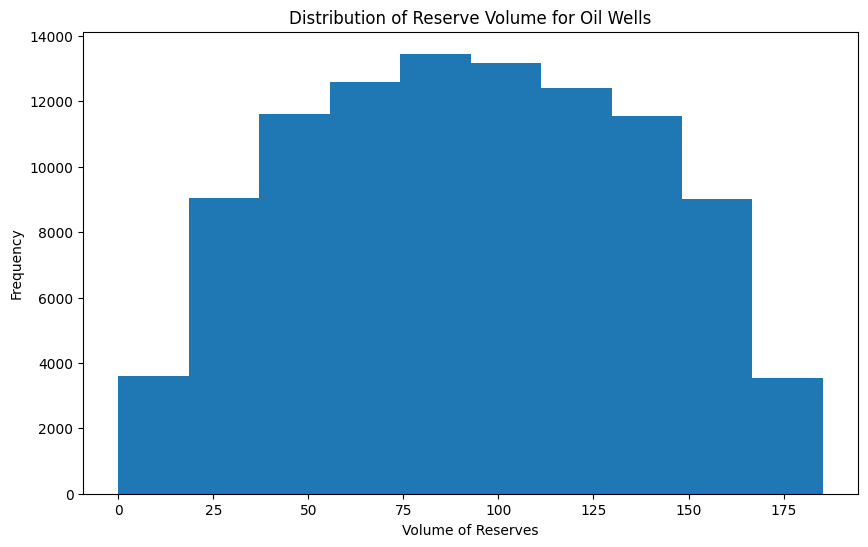

In [32]:
data1['product'].plot(kind = 'hist',
                      ylabel = 'Frequency',
                      title = 'Distribution of Reserve Volume for Oil Wells',
                      figsize = (10, 6))

plt.xlabel('Volume of Reserves')
plt.show()

In [68]:
# data1['product'].plot(kind = 'hist',
#     ylabel = 'Frequency',
#     title = 'Distribution of Reserve Volume for Oil Wells',
#     figsize = (10, 6),
#     xlabel = 'Volume of Reserves')

# plt.show()

In [12]:
data2 = pd.read_csv('/datasets/geo_data_1.csv')
data2

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
data2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [15]:
data2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [16]:
data2.duplicated().sum()

0

In [17]:
data2['id'].duplicated().sum()

In [ ]:
data2.drop_duplicates(subset = ['id'], inplace = True)

In [18]:
data2['id'].duplicated().sum()

0

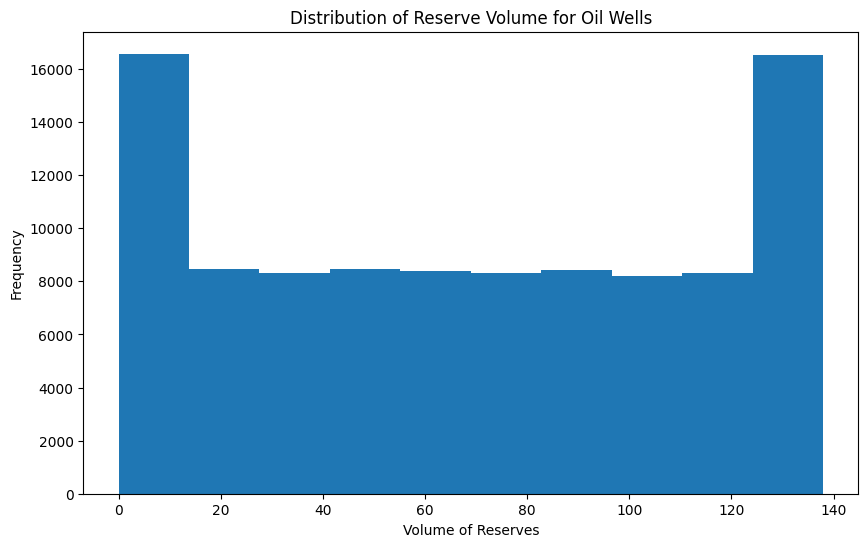

In [31]:
data2['product'].plot(kind = 'hist',
                      ylabel = 'Frequency',
                      title = 'Distribution of Reserve Volume for Oil Wells',
                      figsize = (10, 6))

plt.xlabel('Volume of Reserves')
plt.show()

In [24]:
data3 = pd.read_csv('/datasets/geo_data_2.csv')
data3

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [25]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [26]:
data3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [27]:
data3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [28]:
data3.duplicated().sum()

0

In [29]:
data3['id'].duplicated().sum()

In [ ]:
data3.drop_duplicates(subset = ['id'], inplace = True)

In [30]:
data3['id'].duplicated().sum()

0

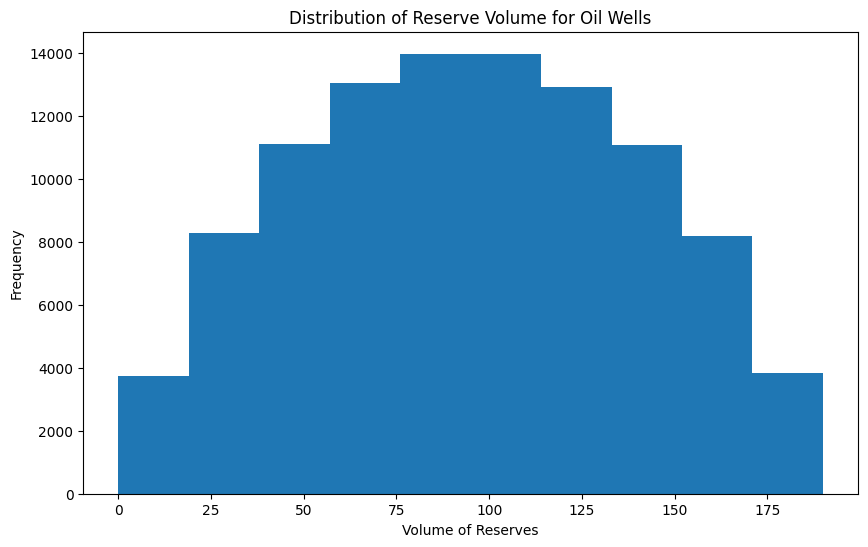

In [34]:
data3['product'].plot(kind = 'hist',
                      ylabel = 'Frequency',
                      title = 'Distribution of Reserve Volume for Oil Wells',
                      figsize = (10, 6))

plt.xlabel('Volume of Reserves')
plt.show()

In [35]:
data1 = data1.drop(['id'], axis = 1)
data2 = data2.drop(['id'], axis = 1)
data3 = data3.drop(['id'], axis = 1)

### Conclusion

- Although there was no full row duplicates, there were duplicate ids that we had to remove.
- The id column will be dropped, as we do not need this for the model training.
- Region 1 and 3 had very similar distributions in their data, while Region 2 had low outliers and high outliers.

## Train and test the model for each region

In [36]:
state = np.random.RandomState(12345)
data = [data1, data2, data3]

In [46]:
def linear_train(df):
    features = df.drop(['product'], axis = 1)
    target = df['product']
    
    features_train, features_valid, target_train, target_valid = \
    train_test_split(features, target, test_size = .25, random_state = state)
    
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
    features_valid.loc[:, numeric] = scaler.transform(features_valid[numeric])
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    print(f'RMSE: {mean_squared_error(target_valid, predictions_valid) ** 0.5}')
    print(f'Average Volume: {predictions_valid.mean()}')
    return target_valid, predictions_valid

In [52]:
data1_target, data1_predictions = linear_train(data1)

RMSE: 37.72612799032354
Average Volume: 92.53756436518852


In [53]:
data2_target, data2_predictions = linear_train(data2)

RMSE: 0.8952623502062992
Average Volume: 68.94354876689626


In [54]:
data3_target, data3_predictions = linear_train(data3)

RMSE: 39.93697530982077
Average Volume: 95.22055828105603


### Conclusion
The results show that:
- Region 1 has an RSME of about 37.82 and average volume of 92.39
- Region 2 has an RSME of about 0.89 and average volume of 69.36
- Region 3 has an RSME of about 39.96 and average volume of 95.09

From these results we can say that:
- Region 3 has the worst RSME and the average volume is higher than Region 1 and 2, which shows that the model inaccurately predicted volumes of the new wells compared to the other 2 regions
- Region 1 and 3 have very similar results of RSME and average volume which shows that these models have very similar predictions
- However Region 2 did show the best results and that gives us an idea of what model we should move forward with

## Prepare for profit calculation

In [57]:
#Initiating constant variables
NUM = 500
NUM_BEST = 200
NUM_WELLS = 200
BUDGET = 100000000
REV = 4500
RISK = 0.025
#Calculate the volume of reserves sufficient for developing a new well without losses
print(BUDGET / NUM_BEST / REV)

111.11111111111111


### Conclusion

- All of our conditional constant variables are set.
- An average volume of 111.11 is needed to garner profit from this project.
- With the average volume of 111.11 to achieve profit, the average volume currently predicted with our model will not be enough to avoid losses.

## Write a function to calculate profit from a set of selected oil wells and model predictions

In [58]:
pd.Series(data1_predictions).sort_values(ascending = False)

22313    177.600836
4159     175.512191
23029    173.918721
9742     173.221413
7614     172.558494
            ...    
20588     17.567350
15175     15.831452
18355      9.996734
1920       8.501788
19110      2.618784
Length: 24998, dtype: float64

In [59]:
pd.Series(data1_target).reset_index(drop = True)

0        162.976526
1         80.217274
2        161.329503
3         38.035923
4         54.649423
            ...    
24993    125.074485
24994    108.903992
24995      8.698493
24996     25.424972
24997     73.465128
Name: product, Length: 24998, dtype: float64

In [60]:
def calc_profit(target, predictions):
    target = pd.Series(target).reset_index(drop = True)
    predictions = pd.Series(predictions)
    predictions_sorted = predictions.sort_values(ascending = False)
    best = target[predictions_sorted.index][:NUM_BEST]
    return (best.sum() * (REV)) - BUDGET

In [61]:
calc_profit(data1_target, data1_predictions)

33008103.657851756

In [62]:
calc_profit(data2_target, data2_predictions)

24150866.966815114

In [63]:
calc_profit(data3_target, data3_predictions)

23873866.413945645

### Conclusion
Based on the calculations we have:
- Region 1 has a profit of about \$33,318,619.
- Region 2 has a profit of about \$24,150,866.
- Region 3 has a profit of about \$28,213,466.

Region 1 shows promise of being the region of choice for our project.

## Calculate risks and profit for each region

In [64]:
def bootstrap_profit(target, predictions):
    profit = []
    target = pd.Series(target).reset_index(drop = True)
    for i in range(1000):
        subsample = target.sample(n = NUM, replace = True, random_state = state)
        pred_subsample = predictions[subsample.index]
        profit.append(calc_profit(subsample, pred_subsample))
    profit = pd.Series(profit)
    print(f'Average Profit: {profit.mean()}')
    confidence_interval = st.t.interval(.95, len(profit) - 1, profit.mean(), profit.sem())
    print(f'95% Confidence Interval: {confidence_interval}')
    print(f'Risk of losses: {round((len(profit[profit < 0]) / len(profit)) * 100, 2)}%')
    profit.plot(kind = 'hist',
               title = 'Distribution of Profit',
               ylabel = 'Frequency')
    
    plt.xlabel('Profit Predicted')
    plt.show()

Average Profit: 4359108.939918749
95% Confidence Interval: (4202006.8335451465, 4516211.046292352)
Risk of losses: 4.9%


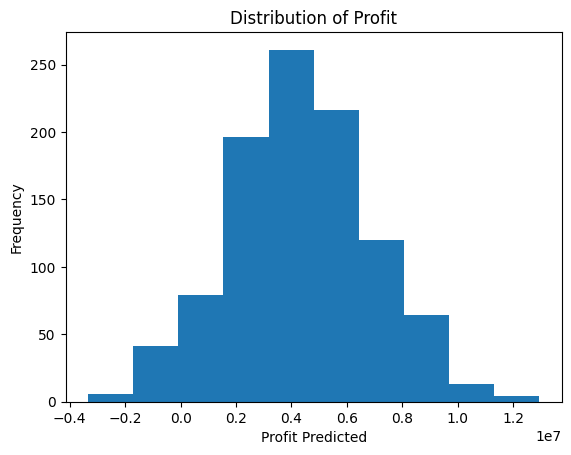

In [65]:
bootstrap_profit(data1_target, data1_predictions)

Average Profit: 4842468.833357369
95% Confidence Interval: (4712409.29758674, 4972528.369127997)
Risk of losses: 0.8%


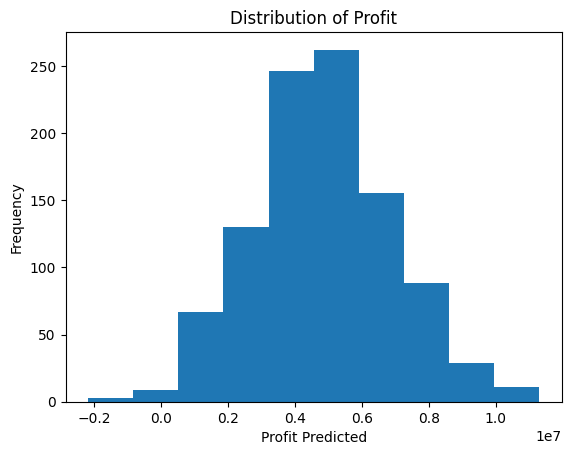

In [66]:
bootstrap_profit(data2_target, data2_predictions)

Average Profit: 3328226.6128179873
95% Confidence Interval: (3162174.909061589, 3494278.316574386)
Risk of losses: 11.0%


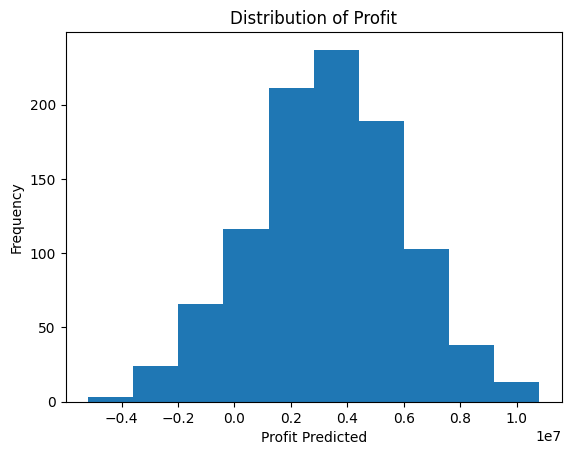

In [67]:
bootstrap_profit(data3_target, data3_predictions)

### Conclusion

The results of our bootstrapping technique show that:

- Region 1 has the 2nd most average profit, as well as the 2nd highest risk of losses.
- Region 2 has the best average profit, as well as the lowest risk of losses.
- Region 3 has the least amount of profit, as well as the highest risk of losses.

We can see that average profit and risk of losses are correlated as the more profit you have, the less likely the risk of losses are.

The confidence interval of Region 2 also is the most narrow which shows results are much more consistent for this region.

From these results, Region 2 will be the area where we would decide to do our project on.

## Conclusion

<b> Preparing the Data </b>

- Although there was no full row duplicates, there were duplicate ids that we had to remove.
- The id column will be dropped, as we do not need this for the model training.
- Region 1 and 3 had very similar distributions in their data, while Region 2 had low outliers and high outliers.

<b> Model Training </b>

The results show that:
- Region 1 has an RSME of about 37.82 and average volume of 92.39
- Region 2 has an RSME of about 0.89 and average volume of 69.36
- Region 3 has an RSME of about 39.96 and average volume of 95.09

From these results we can say that:
- Region 3 has the worst RSME and the average volume is higher than Region 1 and 2, which shows that the model inaccurately predicted volumes of the new wells compared to the other 2 regions
- Region 1 and 3 have very similar results of RSME and average volume which shows that these models have very similar predictions
- However Region 2 did show the best results and that gives us an idea of what model we should move forward with

<b> Profit Calculation Preparation </b>

- All of our conditional constant variables are set.
- An average volume of 111.11 is needed to garner profit from this project.

<b> Profit Calculation </b>

Based on the calculations we have:
- Region 1 has a profit of about \$33,318,619.
- Region 2 has a profit of about \$24,150,866.
- Region 3 has a profit of about \$28,213,466.

Region 1 shows promise of being the region of choice for our project.

<b> Bootstrapping Technique for Profit and Risk </b>

The results of our bootstrapping technique show that:

- Region 1 has the 2nd most average profit, as well as the 2nd highest risk of losses.
- Region 2 has the best average profit, as well as the lowest risk of losses.
- Region 3 has the least amount of profit, as well as the highest risk of losses.

We can see that average profit and risk of losses are correlated as the more profit you have, the less likely the risk of losses are.

The confidence interval of Region 2 also is the most narrow which shows results are much more consistent for this region.

From these results, Region 2 will be the area where we would decide to do our project on.

<b> Overall Conclusion </b>

From the results that were garnered, I would have to say that Region 2 would be the ideal candidate for the project as they have, on average, the most profit as well as the least amount of risk involved and the most narrow confidence interval.